## Building a Decision Tree Classifier

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
train_set_2 = pd.read_csv("../TrainTestSet/TrainSet2.csv")
train_set_2.head()

,Survived,Sex,Q,S,SibPar,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,...,Age_Fare_1050.0,Age_Fare_1200.0,Age_Fare_1350.0,Age_Fare_1500.0,Age_Fare_1650.0,Age_Fare_1800.0,Age_Fare_1950.0,Age_Fare_2100.0,Age_Fare_2250.0,Age_Fare_2400.0
0,0,1,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Creating x_train, y_train set

In [3]:
y = train_set_2['Survived']
x = train_set_2.drop(['Survived'], axis=1)

In [4]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(x, y, test_size=0.2, random_state=101)

In [5]:
X_train_2 = X_train_2.to_numpy()
y_train_2 = y_train_2.to_numpy()

In [20]:
## Calculate entropy at y

In [6]:
def calculate_entropy(y):
    
    m = len(y)
    entropy = 0.
    p1 = 0
    ## Size must be bigger than 0
    if m <= 0:
        return entropy
    # Iterate over examples to get p1 (ratio of elements that are positive == 1)
    for i in range(m):
        if y[i] == 1:
            p1 += 1
    ## Getting p1 and, by consequence, p2
    p1 = p1 / m
    p2 = 1 - p1
    
    if p1 == 1 or p1 == 0:
        return entropy
    else:
        #Calculating entropy when p1 is not 0 or 1 (because of log2(0))
        entropy = (-p1* np.log2(p1)) - (p2 * np.log2(p2))
        
        return entropy

In [7]:
calculate_entropy(y_train_2)

0.9568614362878476

In [204]:
#Splitting dataset - using current data to split between left and right branches

In [8]:
def split_data(X, feature, root_index):
    
    m = X.shape[0]
    left_branch = []
    right_branch = []
    
    for i in range(m):
        #for each example, divides between left and right branch
        if X[i][feature] == 1:
            left_branch.append(i)
        else:
            right_branch.append(i)
            
    return left_branch, right_branch

In [9]:
#Creates root_index
root_index = np.arange(0, X_train_2.shape[0])

### Calculates information gain

In [10]:
def info_gain(X, y, feature, node_indices):
    
    info_gain = 0.
    #splits data
    left, right = split_data(X, feature, node_indices)
    
    #calculates entropy at branches and root_node
    p1_entr = calculate_entropy(y[node_indices])
    left_entr = calculate_entropy(y[left])
    right_entr = calculate_entropy(y[right])
    
    #Calculates weight for the branches
    weight_lef = len(left)/ (len(right) + len(left))
    weight_ri = 1 - weight_lef
    
    info_gain = p1_entr - (weight_lef * left_entr + right_entr * weight_ri)
    
    return info_gain

In [11]:
info_gain(X_train_2, y_train_2, 0, root_index)

0.21578252669945786

### Considering the best infromation gain, calculates the best feature to split

In [12]:
def best_split(X, y, node_indices):
    m, n = X.shape
    
    best_feature = -1
    aux = 0
    gain_hist = []
    
    for i in range(n):
        gain = info_gain(X, y, i, node_indices)
        gain_hist.append(gain)
        if gain > aux:
            best_feature = i
            aux = gain
    
    return best_feature, gain_hist

0


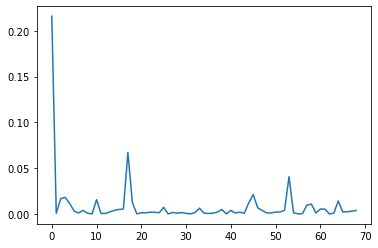

In [13]:
best_feature, gain_hist = best_split(X_train_2, y_train_2, root_index)
print(best_feature)
plt.plot(gain_hist)

### Builds a recursive Decision tree

In [14]:
tree = []

def build_tree_rec(X, y, node_indices, max_depth, current_depth, b_name):
    #Checks if the current branch is max
    if current_depth == max_depth:
        formatting = " "*current_depth + "-"*current_depth
        print(formatting, "%s leaf node with indices" % b_name, node_indices[:3])
        return
    
    #if not, get best feature to split
    bf, gh = best_split(X, y, node_indices)
    
    #append to the tree list
    tree.append((current_depth, b_name, bf, node_indices))
    
    #just prints info
    formatting = "-"*current_depth
    print("%s Depth %d, %s: Split on feature: %d" % (formatting, current_depth, b_name, best_feature))
    
    #splits data with the best feature
    left, right = split_data(X, bf, node_indices)
    
    #recursively calls the function
    build_tree_rec(X, y, left, max_depth, current_depth+1, "Left")
    build_tree_rec(X, y, right, max_depth, current_depth+1, "Right")
    

### Running Decision Tree Classifier

In [15]:
build_tree_rec(X_train_2, y_train_2, root_index, 2, 0, "Root")

 Depth 0, Root: Split on feature: 0
- Depth 1, Left: Split on feature: 0
  -- Left leaf node with indices [41, 271, 324]
  -- Right leaf node with indices [0, 1, 2]
- Depth 1, Right: Split on feature: 0
  -- Left leaf node with indices [3, 4, 6]
  -- Right leaf node with indices [0, 1, 2]


In [16]:
def check_inc(y, yhat):
    correct = 0
    m = len(yhat)
    for i in range(m):
        if y[i] == 1:
            correct += 1
    
    correct = correct / m
        
    return correct

In [17]:
print(check_inc(y_train_2, tree[1][3])*100)
print(check_inc(y_train_2, tree[2][3])*100)

37.719298245614034
38.03921568627451
